In [84]:
import cv2 as cv
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm
import PIL as pl

In [85]:

test_dir = "Rock-Paper-Scissors/test"
train_dir = "Rock-Paper-Scissors/train"
val_dir = "Rock-Paper-Scissors/validation"


In [86]:
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

In [87]:
class RpsClassifier(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [88]:
dataset = RpsClassifier(data_dir=train_dir, transform=transform)
dataset_test = RpsClassifier(data_dir=test_dir, transform=transform)
dataset_validation = RpsClassifier(data_dir=val_dir, transform=transform)

In [89]:
target_to_class = {v: k for k, v in dataset.data.class_to_idx.items()}
print(target_to_class)

{0: 'paper', 1: 'rock', 2: 'scissors'}


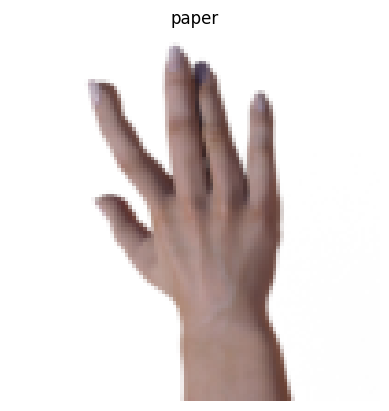

In [90]:
# Visualizza un esempio
image, label = dataset[10]

# Denormalizza per mostrare con matplotlib
img = image * 0.5 + 0.5
img = img.permute(1, 2, 0)

plt.imshow(img)
plt.title(dataset.classes[label])
plt.axis("off")
plt.show()


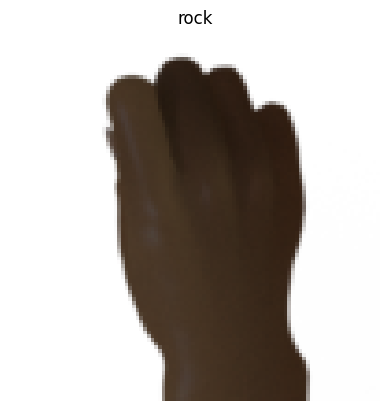

In [91]:
image, label = dataset[1130]
img = image * 0.5 + 0.5
img = img.permute(1, 2, 0)

plt.imshow(img)
plt.title(dataset.classes[label])
plt.axis("off")
plt.show()

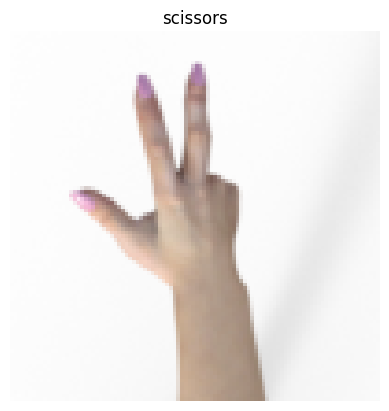

In [92]:
image, label = dataset[2380]
img = image * 0.5 + 0.5
img = img.permute(1, 2, 0)

plt.imshow(img)
plt.title(dataset.classes[label])
plt.axis("off")
plt.show()

In [93]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [94]:
# iterate over dataset
for image, label in dataset:
    break

In [95]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [96]:
for images, labels in dataloader:
    break

In [97]:
images.shape, labels.shape

(torch.Size([32, 3, 100, 100]), torch.Size([32]))

In [98]:
labels

tensor([2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0,
        1, 0, 1, 0, 2, 1, 0, 0])